# EXERCISES MACHINE LEARNING

---

## scikit-learn machine learning pipeline with validation

---

(concrete compressive strength dataset)

### Task 1 : Import libraries

Import the necessary libraries (pandas, Numpy, Matplotlib, Seaborn and scikit-learn libraries)

In [1]:
from sklearn.model_selection import train_test_split
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Task 2 : Set Seaborn style

Choose a seaborn style for plots.

In [2]:
sns.set()

### Task 3 : Load the data

Load the 'Concrete_Data.csv' from the data directory and display the first rows.

In [3]:
df = pd.read_csv('./data/Concrete_Data.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Task 4 : Key statistics and missing values

Understand the dataset by displaying key statistics and check for missing values

In [4]:
print(df.describe())
df.info()

            cement         slag       flyash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864    73.895825    54.188350   181.567282          6.204660   
std     104.506364    86.279342    63.997004    21.354219          5.973841   
min     102.000000     0.000000     0.000000   121.800000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.400000   
75%     350.000000   142.950000   118.300000   192.000000         10.200000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarseaggregate  fineaggregate          age        csMPa  
count      1030.000000    1030.000000  1030.000000  1030.000000  
mean        972.918932     773.580485    45.662136    35.817961  
std          77.753954      80.175980    63.169912    16.705742  
min         801.000000  

### Task 5 : Heatmap with correlations

Plot a heatmap of the correlation matrix to understand the relationships between the target variable 'csMPa' and all other variables (predictors).

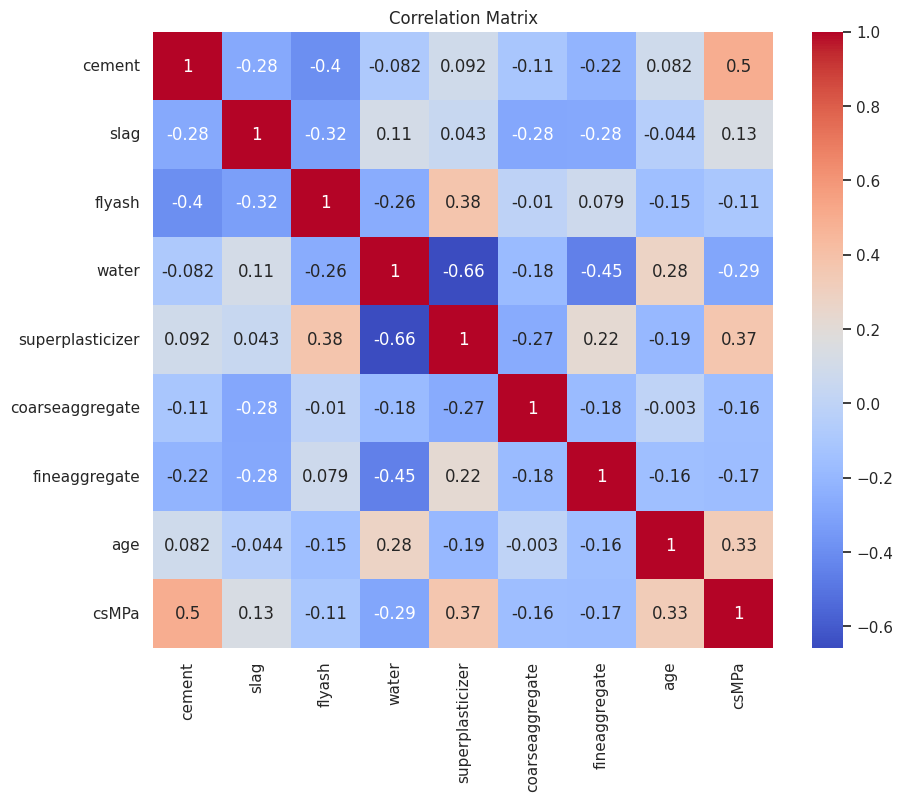

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# df_two = df.drop('csMPa', axis='columns')
# print(df_two)
# print(df)
# 
# mat = confusion_matrix(df['csMPa'], df_two)
# # 
# sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
# plt.xlabel('predicted value')
# plt.ylabel('true value')

### Task 6 : Simple linear regression

Perform a simple linear regression with 'csMPa' as target and one feature.

What feature seems to be the best candidate for the job?

Use a standard test setup (training set and test set) and make the predictions 
for the observations in the test set.

In [6]:
X = df[['cement']]
# print(X)
y = df['csMPa']
# print(y)
# X.__class__
# np.array(X)[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression().fit(X_train, y_train)
model_predict = model.predict(X_test)

### Task 7 : Validation

Calculate and display the R-squared and Mean Squared Error (MSE) for the simple linear regression.

In [7]:
print(r2_score(y_test, model_predict))
print(mean_squared_error(y_test, model_predict))

0.32221547485788693
178.51464605924417


### Task 8 : Regression line

Plot the regression line along with the test data points and print the intercept and coefficients.

[0.07674384]
14.663991392890086


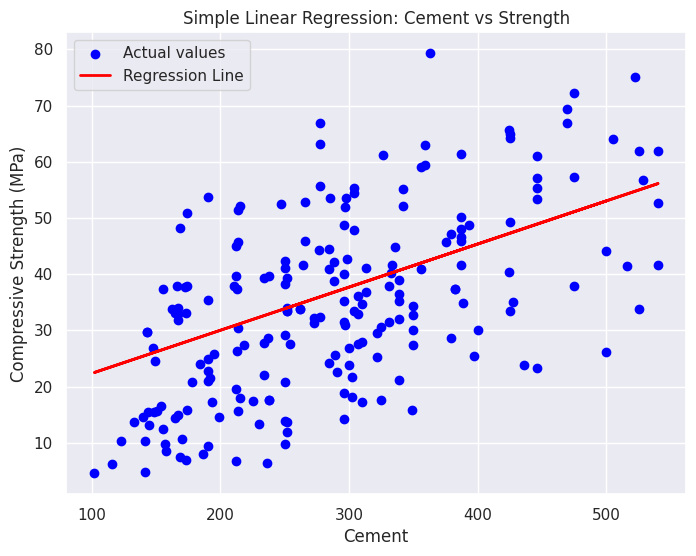

In [37]:
print(model.coef_)
print(model.intercept_)
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, model_predict, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Cement')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.title('Simple Linear Regression: Cement vs Strength')
plt.show()

### Task 9 : Linear regression with more predictors

As we see the single feature explains the compressive strength not to well. We continue our search for a better model:
include more than one variable in our regression model. What other 2 features are potential good candidates?
Make predictions for the test set and calculate the Mean Squared Error and R-squared. Print the coefficients and the intercept.

In [47]:
X = df[['cement', 'water', 'age']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)
model_predict = model.predict(X_test)

print(f'R-squared          : {r2_score(y_test, model_predict):.3f}')
print(f'Mean Squared Error : {mean_squared_error(y_test, model_predict):.3f}')
print(f'Intercept          : {model.intercept_:.3f}')
print(f'Coefficients       : {model.coef_}')

R-squared          : 0.500
Mean Squared Error : 128.753
Intercept          : 62.186
Coefficients       : [ 0.06770251 -0.27644885  0.10625113]


---

## scikit-learn machine learning pipeline with model selection and hyperparameter tuning using cross-validation

---

### 1. PREDICT PENGUIN SPECIES WITH HYPERPARAMETER TUNING USING CROSS-VALIDATION

We want to build a model to predict the penguin species based on some penguin characteristics we can observe. We have a labeled dataset <strong>'penguin'</strong> that is part of the Seaborn built-in datasets. We want to use a decision tree and want to experiment with following hyperparameters to find the best solution: maximum tree depth ranging from 3 tot 10, and split criterion equal to 'gini' or 'entropy'. Derive the best model, using a decision tree with the given set of hyperparameter values, using 3-fold cross validation with recall as validation measure for the hyperparameter tuning. Use <strong>species</strong> as the target variable and all other variables except <strong>island</strong> and <strong>sex</strong> as predictors.

### 2. PREDICT PENGUIN SPECIES WITH HYPERPARAMETER TUNING USING CROSS-VALIDATION (MANUALLY)

If everything went well, you used specific scikit-learn features for the cross validation and grid search (GridSearchCV) that do all the work (as seen in the lecture). 

In this exercise, we want you to program the procedure for the hyperparameter tuning with cross-validation yourself. So program the steps of hyperparameter tuning and cross-validation yourself, without using the cross-validation and grid search functions of scikit-learn (so do not use functions like GridSearchCV). 

Use the same data (target variable and predictors) as in the previous exercise. Find the best model using 3-fold cross validation. To make it simpler, limit the hyperparameters to be checked to split criterion equal to 'entropy' and maximum tree depth equal to 3,5,8 and 10.

The only scikit-learn functions you can use are train_test_split, the functions to derive, plot and apply a decision tree (DecisionTreeClassifier and it's methods - fit, predict - plot_tree) and the functions for the calculation of validation metrics (confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, classification_report).

So be sure to understand the procedure for hyperparameter tuning with cross-validation (how is the data split, which iterations are needed, how are decisions on the best model taken, ...) and develop a Python program accordingly.